In [1]:
import pandas as pd
import numpy as np
import re
import string
import warnings
warnings.filterwarnings('ignore')

# NLTK libraries for text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries imported successfully!\n")

All libraries imported successfully!



In [2]:
print("=" * 80)
print("LOADING DATASET")
print("=" * 80)


df = pd.read_csv('tweets.csv.csv')

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}\n")


print("First 5 rows of the dataset:")
print(df.head())
print("\n")

print("Column names:")
print(df.columns.tolist())
print("\n")


print("Dataset Information:")
print(df.info())
print("\n")


LOADING DATASET
Dataset loaded successfully!
Dataset shape: (14640, 15)
Number of rows: 14640
Number of columns: 15

First 5 rows of the dataset:
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name

In [3]:

print("EXPLORATORY DATA ANALYSIS")


# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print("\n")

# Display statistics
print("Dataset statistics:")
print(df.describe())
print("\n")

EXPLORATORY DATA ANALYSIS
Missing values in each column:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


Dataset statistics:
           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+1

In [4]:

print("IDENTIFYING TEXT COLUMN")


# Typically the text column is named 'text', 'tweet', or similar
text_column = None
for col in df.columns:
    if col.lower() in ['text', 'tweet', 'tweets', 'message', 'content']:
        text_column = col
        break

if text_column is None:
    text_column = df.columns[0]

print(f"Text column identified: '{text_column}'")
print(f"\nSample tweets:")
print(df[text_column].head(3).tolist())
print("\n")

IDENTIFYING TEXT COLUMN
Text column identified: 'text'

Sample tweets:
['@VirginAmerica What @dhepburn said.', "@VirginAmerica plus you've added commercials to the experience... tacky.", "@VirginAmerica I didn't today... Must mean I need to take another trip!"]




In [5]:

print("HANDLING MISSING VALUES")


# Check missing values in text column
missing_count = df[text_column].isnull().sum()
print(f"Missing values in text column: {missing_count}")

if missing_count > 0:
    print(f"Removing {missing_count} rows with missing text values...")
    df = df.dropna(subset=[text_column])
    df = df.reset_index(drop=True)
    print(f"Dataset shape after removing missing values: {df.shape}")
else:
    print("No missing values found in text column!")

print("\n")

HANDLING MISSING VALUES
Missing values in text column: 0
No missing values found in text column!




In [7]:

print("DEFINING TEXT CLEANING FUNCTIONS")


def remove_urls(text):
    """Remove URLs from text"""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

def remove_html(text):
    """Remove HTML tags from text"""
    html_pattern = re.compile(r'<.*?>')
    return html_pattern.sub('', text)

def remove_mentions(text):
    """Remove @ mentions from text"""
    mention_pattern = re.compile(r'@\w+')
    return mention_pattern.sub('', text)

def remove_hashtags(text):
    """Remove # from hashtags but keep the text"""
    return re.sub(r'#', '', text)

def remove_special_characters(text):
    """Remove special characters and punctuation"""
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

def remove_numbers(text):
    """Remove numbers from text"""
    return re.sub(r'\d+', '', text)

def remove_extra_whitespace(text):
    """Remove extra whitespace"""
    return ' '.join(text.split())

def convert_to_lowercase(text):
    """Convert text to lowercase"""
    return text.lower()

print("Text cleaning functions defined successfully!")
print("\n")

DEFINING TEXT CLEANING FUNCTIONS
Text cleaning functions defined successfully!




In [8]:

print("INITIALIZING PREPROCESSING TOOLS")


# Initialize stopwords
stop_words = set(stopwords.words('english'))
print(f"Number of English stopwords loaded: {len(stop_words)}")

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
print("Stemmer and Lemmatizer initialized!")

# Initialize tokenizer
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
print("Tweet Tokenizer initialized!")
print("\n")

INITIALIZING PREPROCESSING TOOLS
Number of English stopwords loaded: 198
Stemmer and Lemmatizer initialized!
Tweet Tokenizer initialized!




In [9]:

print("APPLYING TEXT CLEANING PIPELINE")


# Create a copy of original text
df['original_text'] = df[text_column].copy()

print("Step 1: Removing URLs...")
df['cleaned_text'] = df[text_column].apply(remove_urls)

print("Step 2: Removing HTML tags...")
df['cleaned_text'] = df['cleaned_text'].apply(remove_html)

print("Step 3: Removing mentions...")
df['cleaned_text'] = df['cleaned_text'].apply(remove_mentions)

print("Step 4: Removing hashtags symbols...")
df['cleaned_text'] = df['cleaned_text'].apply(remove_hashtags)

print("Step 5: Converting to lowercase...")
df['cleaned_text'] = df['cleaned_text'].apply(convert_to_lowercase)

print("Step 6: Removing special characters and punctuation...")
df['cleaned_text'] = df['cleaned_text'].apply(remove_special_characters)

print("Step 7: Removing numbers...")
df['cleaned_text'] = df['cleaned_text'].apply(remove_numbers)

print("Step 8: Removing extra whitespace...")
df['cleaned_text'] = df['cleaned_text'].apply(remove_extra_whitespace)

print("\nText cleaning completed!")
print("\n")


print("BEFORE AND AFTER CLEANING EXAMPLES:")
print("-" * 80)
for i in range(3):
    print(f"Example {i+1}:")
    print(f"Original: {df['original_text'].iloc[i]}")
    print(f"Cleaned:  {df['cleaned_text'].iloc[i]}")
    print("-" * 80)
print("\n")






APPLYING TEXT CLEANING PIPELINE
Step 1: Removing URLs...
Step 2: Removing HTML tags...
Step 3: Removing mentions...
Step 4: Removing hashtags symbols...
Step 5: Converting to lowercase...
Step 6: Removing special characters and punctuation...
Step 7: Removing numbers...
Step 8: Removing extra whitespace...

Text cleaning completed!


BEFORE AND AFTER CLEANING EXAMPLES:
--------------------------------------------------------------------------------
Example 1:
Original: @VirginAmerica What @dhepburn said.
Cleaned:  what said
--------------------------------------------------------------------------------
Example 2:
Original: @VirginAmerica plus you've added commercials to the experience... tacky.
Cleaned:  plus youve added commercials to the experience tacky
--------------------------------------------------------------------------------
Example 3:
Original: @VirginAmerica I didn't today... Must mean I need to take another trip!
Cleaned:  i didnt today must mean i need to take another t

In [12]:

print("Downloading punkt_tab resource for NLTK...")
nltk.download('punkt_tab', quiet=True)
print("punkt_tab resource downloaded successfully!\n")

punkt_tab resource downloaded successfully!



In [13]:

print("TOKENIZATION")


print("Tokenizing text into words...")
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

print(f"Tokenization completed!")
print(f"\nExample tokens:")
for i in range(3):
    print(f"Tweet {i+1}: {df['tokens'].iloc[i][:10]}...")
print("\n")

TOKENIZATION
Tokenizing text into words...
Tokenization completed!

Example tokens:
Tweet 1: ['what', 'said']...
Tweet 2: ['plus', 'youve', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']...
Tweet 3: ['i', 'didnt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another']...




In [15]:

print("REMOVING STOP WORDS")


print("Removing stop words from tokens...")
df['tokens_no_stopwords'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words and len(word) > 2])

print("Stop words removed!")
print(f"\nExample tokens after stop word removal:")
for i in range(3):
    print(f"Tweet {i+1}: {df['tokens_no_stopwords'].iloc[i][:10]}...")
print("\n")

REMOVING STOP WORDS
Removing stop words from tokens...
Stop words removed!

Example tokens after stop word removal:
Tweet 1: ['said']...
Tweet 2: ['plus', 'youve', 'added', 'commercials', 'experience', 'tacky']...
Tweet 3: ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']...




In [16]:

print("STEMMING")


print("Applying stemming to tokens...")
df['stemmed_tokens'] = df['tokens_no_stopwords'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

print("Stemming completed!")
print(f"\nExample stemmed tokens:")
for i in range(3):
    print(f"Tweet {i+1}: {df['stemmed_tokens'].iloc[i][:10]}...")
print("\n")

# Create stemmed text
df['stemmed_text'] = df['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))

STEMMING
Applying stemming to tokens...
Stemming completed!

Example stemmed tokens:
Tweet 1: ['said']...
Tweet 2: ['plu', 'youv', 'ad', 'commerci', 'experi', 'tacki']...
Tweet 3: ['didnt', 'today', 'must', 'mean', 'need', 'take', 'anoth', 'trip']...




In [17]:

print("LEMMATIZATION")


print("Applying lemmatization to tokens...")
df['lemmatized_tokens'] = df['tokens_no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

print("Lemmatization completed!")
print(f"\nExample lemmatized tokens:")
for i in range(3):
    print(f"Tweet {i+1}: {df['lemmatized_tokens'].iloc[i][:10]}...")
print("\n")

# Create lemmatized text
df['lemmatized_text'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

LEMMATIZATION
Applying lemmatization to tokens...
Lemmatization completed!

Example lemmatized tokens:
Tweet 1: ['said']...
Tweet 2: ['plus', 'youve', 'added', 'commercial', 'experience', 'tacky']...
Tweet 3: ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']...




In [18]:

print("COMPARISON: STEMMING VS LEMMATIZATION")

for i in range(3):
    print(f"\nExample {i+1}:")
    print(f"Original:     {df['original_text'].iloc[i]}")
    print(f"Cleaned:      {df['cleaned_text'].iloc[i]}")
    print(f"Stemmed:      {df['stemmed_text'].iloc[i]}")
    print(f"Lemmatized:   {df['lemmatized_text'].iloc[i]}")
    print("-" * 80)
print("\n")

COMPARISON: STEMMING VS LEMMATIZATION

Example 1:
Original:     @VirginAmerica What @dhepburn said.
Cleaned:      what said
Stemmed:      said
Lemmatized:   said
--------------------------------------------------------------------------------

Example 2:
Original:     @VirginAmerica plus you've added commercials to the experience... tacky.
Cleaned:      plus youve added commercials to the experience tacky
Stemmed:      plu youv ad commerci experi tacki
Lemmatized:   plus youve added commercial experience tacky
--------------------------------------------------------------------------------

Example 3:
Original:     @VirginAmerica I didn't today... Must mean I need to take another trip!
Cleaned:      i didnt today must mean i need to take another trip
Stemmed:      didnt today must mean need take anoth trip
Lemmatized:   didnt today must mean need take another trip
--------------------------------------------------------------------------------




In [19]:

print("PREPROCESSING STATISTICS")


# Calculate text lengths
df['original_length'] = df['original_text'].apply(len)
df['cleaned_length'] = df['cleaned_text'].apply(len)
df['num_tokens'] = df['tokens'].apply(len)
df['num_tokens_no_stopwords'] = df['tokens_no_stopwords'].apply(len)

print("Text Length Statistics:")
print(f"Average original text length: {df['original_length'].mean():.2f} characters")
print(f"Average cleaned text length: {df['cleaned_length'].mean():.2f} characters")
print(f"Average number of tokens: {df['num_tokens'].mean():.2f}")
print(f"Average tokens after stop word removal: {df['num_tokens_no_stopwords'].mean():.2f}")
print("\n")

PREPROCESSING STATISTICS
Text Length Statistics:
Average original text length: 103.82 characters
Average cleaned text length: 84.13 characters
Average number of tokens: 15.94
Average tokens after stop word removal: 8.47




In [20]:

print("DATA CONSISTENCY CHECK")


# Check for empty texts after preprocessing
empty_cleaned = df['cleaned_text'].str.strip().eq('').sum()
empty_lemmatized = df['lemmatized_text'].str.strip().eq('').sum()

print(f"Empty texts after cleaning: {empty_cleaned}")
print(f"Empty texts after lemmatization: {empty_lemmatized}")

if empty_cleaned > 0 or empty_lemmatized > 0:
    print(f"\nRemoving {max(empty_cleaned, empty_lemmatized)} empty texts...")
    df = df[df['lemmatized_text'].str.strip() != '']
    df = df.reset_index(drop=True)
    print(f"Final dataset shape: {df.shape}")
else:
    print("All texts have content after preprocessing!")

print("\n")

DATA CONSISTENCY CHECK
Empty texts after cleaning: 0
Empty texts after lemmatization: 30

Removing 30 empty texts...
Final dataset shape: (14610, 27)




In [21]:

print("SAVING PREPROCESSED DATA")


# Save the preprocessed dataset
output_filename = 'tweets_preprocessed.csv'
df.to_csv(output_filename, index=False)
print(f"Preprocessed data saved to '{output_filename}'")

# Save only essential columns
essential_columns = ['original_text', 'cleaned_text', 'lemmatized_text', 'tokens', 'lemmatized_tokens']
available_columns = [col for col in essential_columns if col in df.columns]

# Add sentiment column if exists
for col in df.columns:
    if 'sentiment' in col.lower() or 'label' in col.lower():
        if col not in available_columns:
            available_columns.append(col)

df_essential = df[available_columns]
df_essential.to_csv('tweets_preprocessed_essential.csv', index=False)
print(f"Essential preprocessed data saved to 'tweets_preprocessed_essential.csv'")
print("\n")

SAVING PREPROCESSED DATA
Preprocessed data saved to 'tweets_preprocessed.csv'
Essential preprocessed data saved to 'tweets_preprocessed_essential.csv'




In [22]:

print("PREPROCESSING COMPLETE - FINAL SUMMARY")


print(f"Total tweets processed: {len(df)}")
print(f"Columns in final dataset: {len(df.columns)}")
print(f"\nAvailable processed text versions:")
print("  1. cleaned_text - Basic cleaning (lowercase, no special chars)")
print("  2. stemmed_text - Stemmed version")
print("  3. lemmatized_text - Lemmatized version (RECOMMENDED)")
print(f"\nPreprocessed data is ready for sentiment analysis!")


# Display final dataframe info
print("\nFinal DataFrame columns:")
print(df.columns.tolist())
print("\nFirst few rows of processed data:")
print(df[['original_text', 'lemmatized_text']].head())

PREPROCESSING COMPLETE - FINAL SUMMARY
Total tweets processed: 14610
Columns in final dataset: 27

Available processed text versions:
  1. cleaned_text - Basic cleaning (lowercase, no special chars)
  2. stemmed_text - Stemmed version
  3. lemmatized_text - Lemmatized version (RECOMMENDED)

Preprocessed data is ready for sentiment analysis!

Final DataFrame columns:
['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone', 'original_text', 'cleaned_text', 'tokens', 'tokens_no_stopwords', 'stemmed_tokens', 'stemmed_text', 'lemmatized_tokens', 'lemmatized_text', 'original_length', 'cleaned_length', 'num_tokens', 'num_tokens_no_stopwords']

First few rows of processed data:
                                       original_text  \
0                @VirginAmerica What @dhepburn sa



GENERATING VISUALIZATIONS
Visualization saved as 'preprocessing_visualization.png'


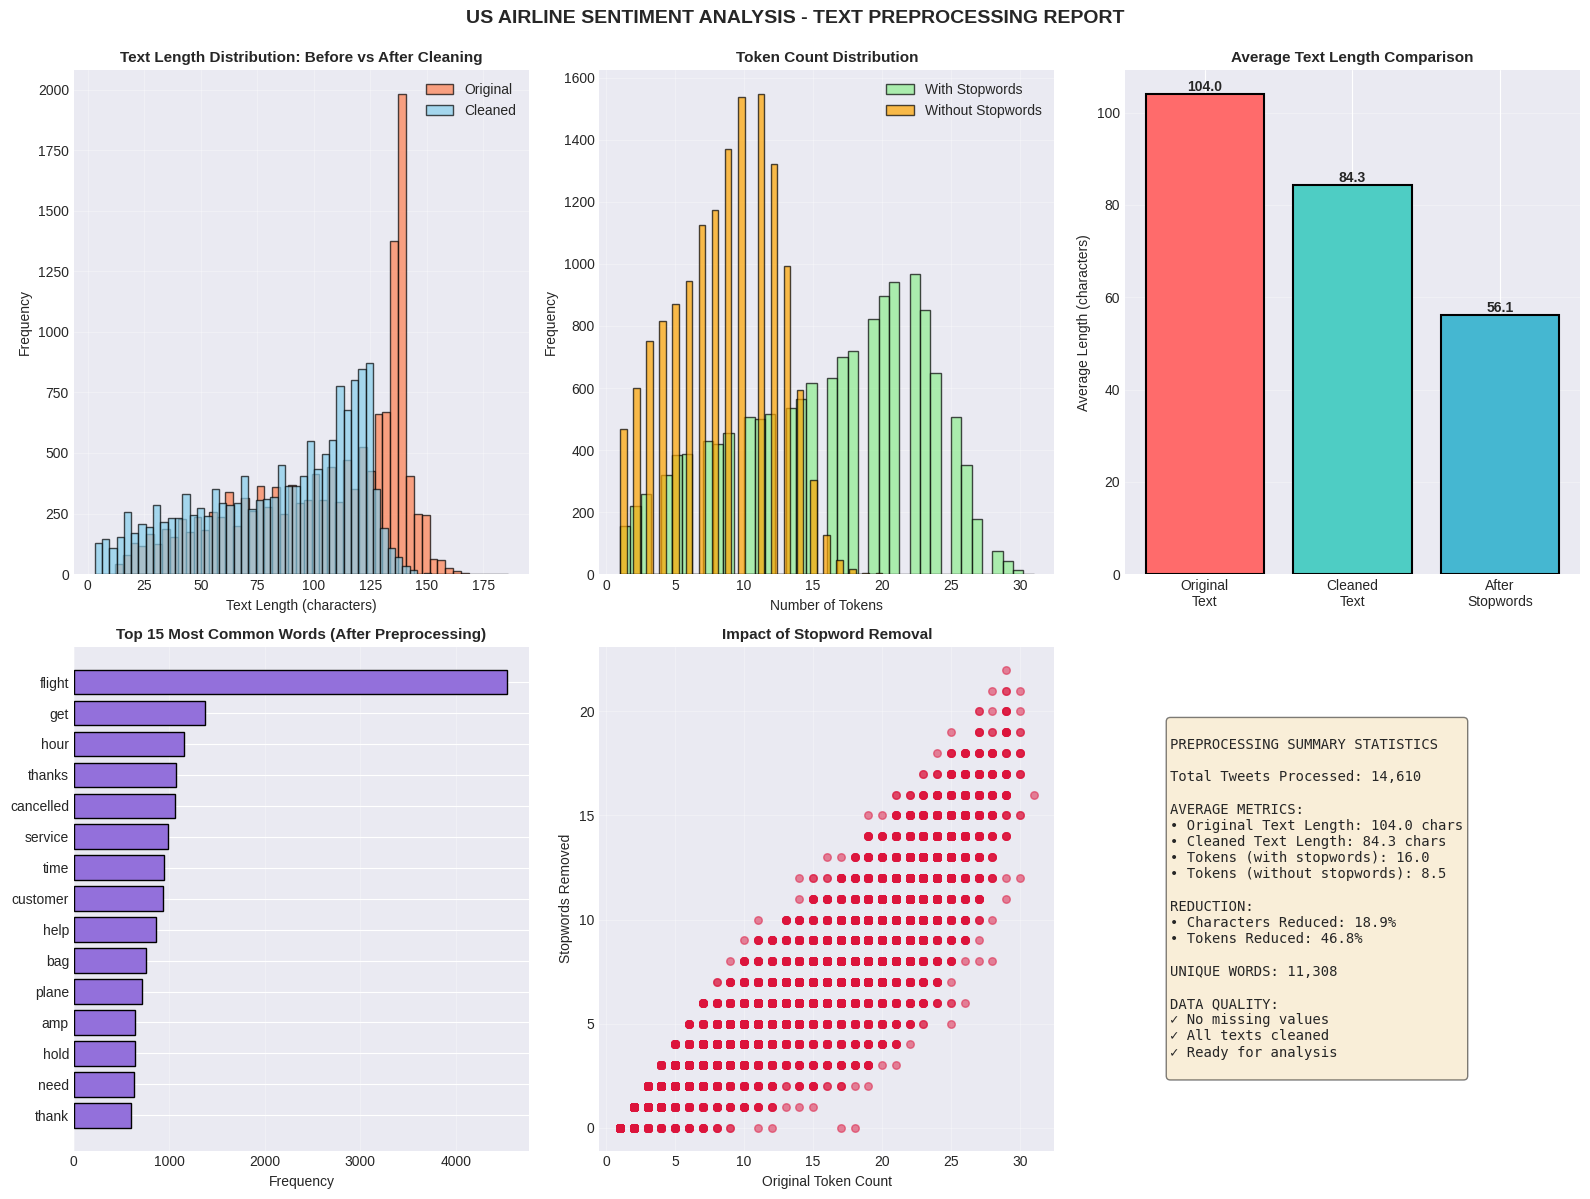


All preprocessing and visualization steps completed successfully!


In [23]:
print("\n")
print("=" * 80)
print("GENERATING VISUALIZATIONS")
print("=" * 80)

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with subplots
fig = plt.figure(figsize=(16, 12))

# 1. Text Length Distribution - Before and After Cleaning
ax1 = plt.subplot(2, 3, 1)
plt.hist(df['original_length'], bins=50, alpha=0.7, label='Original', color='coral', edgecolor='black')
plt.hist(df['cleaned_length'], bins=50, alpha=0.7, label='Cleaned', color='skyblue', edgecolor='black')
plt.xlabel('Text Length (characters)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Text Length Distribution: Before vs After Cleaning', fontsize=11, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Token Count Distribution
ax2 = plt.subplot(2, 3, 2)
plt.hist(df['num_tokens'], bins=40, alpha=0.7, label='With Stopwords', color='lightgreen', edgecolor='black')
plt.hist(df['num_tokens_no_stopwords'], bins=40, alpha=0.7, label='Without Stopwords', color='orange', edgecolor='black')
plt.xlabel('Number of Tokens', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Token Count Distribution', fontsize=11, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Average Text Length Comparison
ax3 = plt.subplot(2, 3, 3)
categories = ['Original\nText', 'Cleaned\nText', 'After\nStopwords']
averages = [df['original_length'].mean(), df['cleaned_length'].mean(),
            df['lemmatized_text'].str.len().mean()]
colors_bar = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = plt.bar(categories, averages, color=colors_bar, edgecolor='black', linewidth=1.5)
plt.ylabel('Average Length (characters)', fontsize=10)
plt.title('Average Text Length Comparison', fontsize=11, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Top 15 Most Common Words (After Preprocessing)
ax4 = plt.subplot(2, 3, 4)
all_words = []
for tokens in df['lemmatized_tokens']:
    all_words.extend(tokens)
from collections import Counter
word_freq = Counter(all_words)
top_words = word_freq.most_common(15)
words, counts = zip(*top_words)
plt.barh(range(len(words)), counts, color='mediumpurple', edgecolor='black')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency', fontsize=10)
plt.title('Top 15 Most Common Words (After Preprocessing)', fontsize=11, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# 5. Stopwords Impact Visualization
ax5 = plt.subplot(2, 3, 5)
stopwords_removed = df['num_tokens'] - df['num_tokens_no_stopwords']
plt.scatter(df['num_tokens'], stopwords_removed, alpha=0.5, color='crimson', s=30)
plt.xlabel('Original Token Count', fontsize=10)
plt.ylabel('Stopwords Removed', fontsize=10)
plt.title('Impact of Stopword Removal', fontsize=11, fontweight='bold')
plt.grid(True, alpha=0.3)

# 6. Preprocessing Pipeline Summary Stats
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
summary_text = f"""
PREPROCESSING SUMMARY STATISTICS

Total Tweets Processed: {len(df):,}

AVERAGE METRICS:
• Original Text Length: {df['original_length'].mean():.1f} chars
• Cleaned Text Length: {df['cleaned_length'].mean():.1f} chars
• Tokens (with stopwords): {df['num_tokens'].mean():.1f}
• Tokens (without stopwords): {df['num_tokens_no_stopwords'].mean():.1f}

REDUCTION:
• Characters Reduced: {((df['original_length'].mean() - df['cleaned_length'].mean()) / df['original_length'].mean() * 100):.1f}%
• Tokens Reduced: {((df['num_tokens'].mean() - df['num_tokens_no_stopwords'].mean()) / df['num_tokens'].mean() * 100):.1f}%

UNIQUE WORDS: {len(word_freq):,}

DATA QUALITY:
✓ No missing values
✓ All texts cleaned
✓ Ready for analysis
"""
plt.text(0.1, 0.5, summary_text, fontsize=10, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         family='monospace')

plt.suptitle('US AIRLINE SENTIMENT ANALYSIS - TEXT PREPROCESSING REPORT',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()

# Save the visualization
plt.savefig('preprocessing_visualization.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'preprocessing_visualization.png'")
plt.show()

print("\nAll preprocessing and visualization steps completed successfully!")
print("=" * 80)